In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as sp

In [3]:
def train(X, y, lda):    
    XT = X.transpose()
    d = X.shape[0]
    n = X.shape[1]
    a = np.dot(X,XT)
    a = 2*a.diagonal()
    w = np.random.rand(d)
    #w = np.zeros(d)
    b = 0
    In = np.ones(n)
    Id = np.ones(d)
    delta = 0.001
    prevRmse = 0
    currRmse = rmse(X, w, b, y)
    while(abs(prevRmse - currRmse) > delta):
        r = (y - X.T.dot(w)) - b
        bOld = b
        b = np.sum(r+b)/float(n)
        r = r - b + bOld;        
        wkOld = 0
        for k in range(0,d):
            ck = 2*(X[k].dot((r.reshape(r.shape[0], 1) + (w[k]*(X[k].T)))))            
            wkOld = w[k]
            if(ck < (-1)*lda):
                w[k] = (ck + lda)/a[k]
            elif((ck <= lda) and (ck >= (-1)*lda)):
                w[k] = 0
            else: 
                w[k]  = (ck - lda)/a[k]
            r = r.reshape(r.shape[0], 1) - (w[k] - wkOld)*X[k].T
            r = np.squeeze(np.asarray(r))            
        prevRmse = currRmse            
        currRmse = rmse(X, w, b, y)
    return w,b,currRmse

In [4]:
def rmse(X, w, b, y):
    r = y - X.T.dot(w) - b
    r_sqr = np.square(r)
    sqrSum = np.sum(r_sqr)
    n = X.shape[0]
    tmp = sqrSum/(n*1.0)
    import math
    return math.sqrt(tmp)
    

In [5]:
def loss(X, w, b, y, lda):
    r = y - X.T.dot(w) - b
    r_sqr = np.square(r)
    sqrSum = np.sum(r_sqr)
    w = np.absolute(w)
    reg = np.sum(w)
    reg = lda*reg
    return sqrSum + reg

In [6]:
if __name__ == '__main__':    
    
    n= 250
    d =80
    X = np.random.standard_normal(size = (d,n))
    k = 10
    wOpt = np.zeros(d)
    wOpt[:k] = 10
    e = np.random.normal(0, 1, size = (n))
    bOpt = 0
    y = X.T.dot(wOpt) + bOpt + e    
    ldaMax = 2*np.amax(abs(X.dot(y - (np.sum(y)/float(n)))))    
    lda = ldaMax
    X1 = sp.csr_matrix(X)
    train(X1, y, lda)
    nonZeroList = []
    precisionList = []
    recallList = []
    lambdaList = []
    prevRmse = 999999999999999
    currRmse = 99999999999999
    
    for i in range(10):
        w,b,trainRmse = train(X1, y, lda)                        
        np.count_nonzero(w[:k])
        correctW = np.count_nonzero(w[:k])        
        prevRmse = currRmse
        currRmse = rmse(X,w,b,y)
        total = np.count_nonzero(w)
        if(total != 0):
            precision = correctW/float(total)
        else:
            precision = 1
        precisionList.append(precision)
        recall = correctW/float(k)
        recallList.append(recall)
        lambdaList.append(lda)
        print "*****************************************"
        print "lambda", lda
        print "trainRmse", trainRmse
        print "Sparsity pattern", np.count_nonzero(w)
        print "*****************************************"
        lda = lda/2
    
    correctW = np.count_nonzero(w[:k])
    total = np.count_nonzero(w)
    precision = correctW/float(total)    
    recall = correctW/float(k)  
    print "*****************************************"
    print "Final Sparsity pattern", np.count_nonzero(w)
    print "Final recall", recall
    print "Final precision", precision
    print "*****************************************"


*****************************************
lambda 5863.72996396
trainRmse 54.0689955653
Sparsity pattern 1
*****************************************
*****************************************
lambda 2931.86498198
trainRmse 34.1680863999
Sparsity pattern 10
*****************************************
*****************************************
lambda 1465.93249099
trainRmse 17.1521854437
Sparsity pattern 10
*****************************************
*****************************************
lambda 732.966245495
trainRmse 8.71088277149
Sparsity pattern 10
*****************************************
*****************************************
lambda 366.483122748
trainRmse 4.61525885293
Sparsity pattern 10
*****************************************
*****************************************
lambda 183.241561374
trainRmse 2.7668664024
Sparsity pattern 10
*****************************************
*****************************************
lambda 91.6207806869
trainRmse 2.06011573524
Sparsity pattern 10
*

In [7]:
print lambdaList

[5863.7299639612138, 2931.8649819806069, 1465.9324909903034, 732.96624549515172, 366.48312274757586, 183.24156137378793, 91.620780686893966, 45.810390343446983, 22.905195171723491, 11.452597585861746]


In [8]:
import matplotlib.pyplot as plt
plt.plot(lambdaList, precisionList)
plt.plot(lambdaList, recallList)
plt.xlabel('Lambda')
plt.ylabel('others')
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

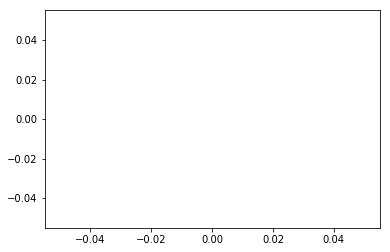

In [9]:
plt.plot(nonZeroList)
plt.show()

In [15]:
    nonZeroList = []
    precisionList = []
    recallList = []
    lambdaList = []
    
    prevRmse = 999999999999999
    currRmse = 99999999999999    
    while(prevRmse > currRmse):
        w,b,trainRmse = train(X1, y, lda)                        
        np.count_nonzero(w[:k])
        correctW = np.count_nonzero(w[:k])        
        prevRmse = currRmse
        currRmse = rmse(X,w,b,y)
        total = np.count_nonzero(w)
        if(total != 0):
            precision = correctW/float(total)
        else:
            precision = 1
        precisionList.append(precision)
        recall = correctW/float(k)
        recallList.append(recall)
        lambdaList.append(lda)
        print "*****************************************"
        print "lambda", lda
        print "trainRmse", trainRmse
        print "Sparsity pattern", np.count_nonzero(w)
        print "*****************************************"
        lda = lda/2

*****************************************
lambda 4.37239662251
trainRmse 15.852381855
Sparsity pattern 80
*****************************************
*****************************************
lambda 2.18619831126
trainRmse 15.852521912
Sparsity pattern 80
*****************************************


In [10]:
    n= 250
    d =80
    X = np.random.normal(0, 10, size = (d,n))
    k = 10
    wOpt = np.zeros(d)
    wOpt[:k] = 10
    e = np.random.normal(0, 10, size = (n))
    bOpt = 0
    y = X.T.dot(wOpt) + bOpt + e
    
    ldaMax = 2*np.amax(abs(X.dot(y - (np.sum(y)/float(n)))))    
    lda = ldaMax
    X1 = sp.csr_matrix(X)
    train(X1, y, lda)


*****************************************
lambda 573098.770105
trainRmse 549.071489916
Sparsity pattern 1
*****************************************
*****************************************
lambda 286549.385053
trainRmse 329.024064853
Sparsity pattern 10
*****************************************
*****************************************
lambda 143274.692526
trainRmse 165.228529537
Sparsity pattern 10
*****************************************
*****************************************
lambda 71637.3462632
trainRmse 84.0320597306
Sparsity pattern 10
*****************************************
*****************************************
lambda 35818.6731316
trainRmse 44.7392685705
Sparsity pattern 10
*****************************************
*****************************************
lambda 17909.3365658
trainRmse 27.1414833139
Sparsity pattern 10
*****************************************
*****************************************
lambda 8954.6682829
trainRmse 20.5042251509
Sparsity pattern 10
*

In [19]:
    lda = 20#2.18619831126#4.37239662251#1.61958470205#3.23916940411#0.809792351027#1.70821731642#3.41643463284#1.70821731642 #3.41643463284
    w,b,trainRmse = train(X1, y, lda)                        
    print "Rmse", trainRmse
#     for i in range(10):
#         w,b,trainRmse = train(X1, y, lda)                        
#         np.count_nonzero(w[:k])
#         correctW = np.count_nonzero(w[:k])
#         total = np.count_nonzero(w)
#         if(total != 0):
#             precision = correctW/float(total)
#         precisionList.append(precision)
#         recall = correctW/float(k)
#         recallList.append(recall)
#         lambdaList.append(lda)
#         lda = lda/2
    print "Sparsity pattern", np.count_nonzero(w)
    correctW = np.count_nonzero(w[:k])
    total = np.count_nonzero(w)
    precision = correctW/float(total)
    print "precision", precision
    recall = correctW/float(k)
    print "recall", recall
    print w[:k]

Rmse 15.8528659128
Sparsity pattern 80
precision 0.125
recall 1.0
[  9.96083208   9.9340541    9.92131921  10.10886832   9.95723088
  10.04508636   9.8917376    9.92701605   9.8723529   10.00018128]
